In [38]:
# Import necessary libraries
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv('Brazil_Data.csv')

In [40]:
# Define the threshold for digital dark zones
radiance_threshold = df['radiance_avg'].median()
speed_threshold = df['avg_d_kbps'].median()

# Classify regions as digital dark zones based on radiance and speed thresholds
df['digital_dark_zone'] = (df['radiance_avg'] < radiance_threshold) & (df['avg_d_kbps'] < speed_threshold)

# Separate the data into two groups based on the 'digital_dark_zone' column
low_radiance = df[df['digital_dark_zone'] == True]
high_radiance = df[df['digital_dark_zone'] == False]

In [41]:
# Perform an independent t-test on average download speeds
t_stat, p_value = stats.ttest_ind(low_radiance['avg_d_kbps'], high_radiance['avg_d_kbps'])

# Print the results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in download speeds between digital dark zones and other regions.")
else:
    print("Fail to reject the null hypothesis: No significant difference in download speeds between digital dark zones and other regions.")


T-statistic: -248.4133279807581, P-value: 0.0
Reject the null hypothesis: Significant difference in download speeds between digital dark zones and other regions.


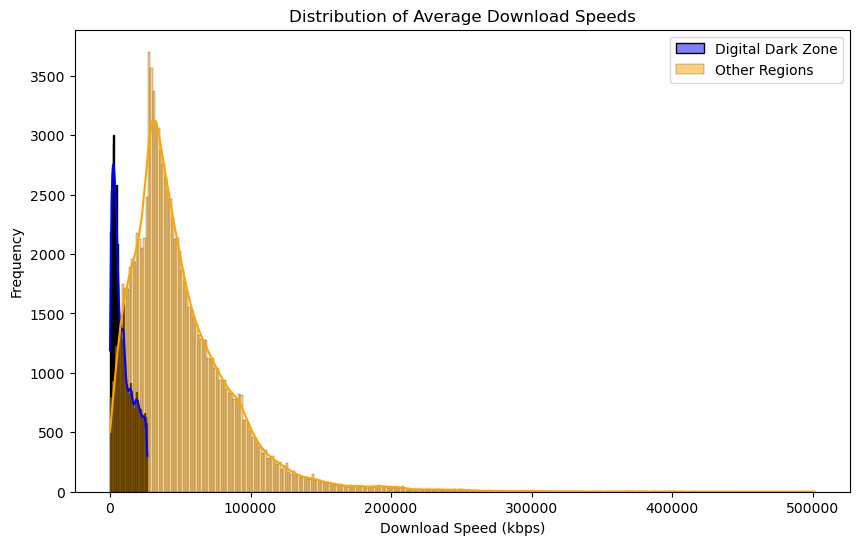

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(low_radiance['avg_d_kbps'], label='Digital Dark Zone', color='blue', kde=True)
sns.histplot(high_radiance['avg_d_kbps'], label='Other Regions', color='orange', kde=True)
plt.legend()
plt.title('Distribution of Average Download Speeds')
plt.xlabel('Download Speed (kbps)')
plt.ylabel('Frequency')
plt.show()